In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

In [5]:
#show all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [7]:
#calculate percentage of ontime value =1 div by all rows

wego['ADJUSTED_ONTIME_COUNT'].value_counts()

ADJUSTED_ONTIME_COUNT
1    270048
0     80281
Name: count, dtype: int64

In [12]:
#average percentage of busses that were on-time (adjusted count)
x = wego['ADJUSTED_ONTIME_COUNT'].mean()
print(format(x,'.2%'))

77.08%


In [9]:
wego['PREV_SCHED_STOP_CANCELLED'].value_counts()

PREV_SCHED_STOP_CANCELLED
0.0    275746
1.0      4254
Name: count, dtype: int64

In [10]:
#Count the values that each row occurs
adjcounts= wego[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 
                        'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()
adjcounts

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,count
0,0,0,1,270048
1,0,1,0,59038
2,0,0,0,11468
3,1,0,0,9775


In [11]:
#percentage of ontime trips
((adjcounts['count'].loc[0])/(adjcounts['count']
                              .loc[0]+adjcounts['count']
                           .loc[1]+adjcounts['count'].loc[3]))


# ALt# Percent of on-time stops - using only tagged rows
# round((wego['ADJUSTED_ONTIME_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
#                                                + wego['ADJUSTED_EARLY_COUNT'].sum() 
#                                                + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

0.7969285341187095

C:\Users\karen\.anaconda\4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


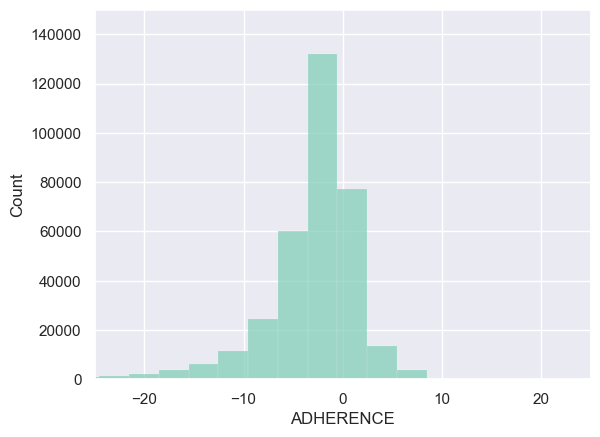

In [34]:
#Overall distribution of adherence
sns.set_theme(style="darkgrid")
palette = sns.color_palette("BuGn")
sns.histplot(data=wego, x="ADHERENCE", binwidth=3, color=palette[2])
plt.ylim(0, 150000)
plt.xlim(-25, 25)

plt.show()

C:\Users\karen\.anaconda\4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(-25.0, 25.0)

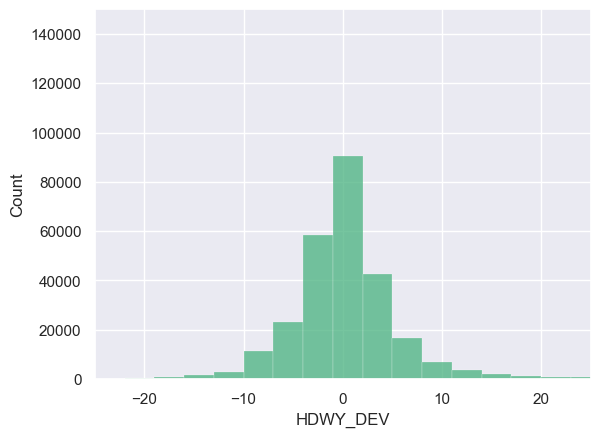

In [18]:
sns.set_theme(style="darkgrid")
palette = sns.color_palette("BuGn", as_cmap=True)
sns.histplot(data=wego, x="HDWY_DEV", binwidth=3, color=palette(0.6))
plt.ylim(0, 150000)
plt.xlim(-25, 25)


In [32]:
#sns.displot(data=wego["ADHERENCE"], kde=True)
#sns.violinplot(data=wego,x=wego["ADHERENCE"])

In [33]:
wego['IS_RELIEF'].value_counts()

IS_RELIEF
0    346141
1      4188
Name: count, dtype: int64

In [29]:
# Filter the DataFrame where 'ADJUSTED_ONTIME_COUNT' is 1
ontime = wego[wego['ADJUSTED_ONTIME_COUNT'] == 1]

ontime.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PERC,HEADWAY_DEVIATION_PERCENTAGE,HEADWAY_IS_BUNCHING,HEADWAY_IS_ACCEPTABLE,HEADWAY_IS_GAPPING
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,NaN,NaN,0,0,0
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,NaN,0,0,0
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,NaN,0,0,0
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN,NaN,0,0,0
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,NaN,NaN,0,0,0


In [37]:
#wego['ADHERENCE'].agg(min, max)
wego.agg({'ADHERENCE': ['min','max','mean']})

,ADHERENCE
min,-948.533333
max,88.383333
mean,-3.188796


In [38]:
wego['ADHERENCE'].max()

88.383333

In [40]:
#trim cancelled = 1 and headway great
sced = wego[wego['PREV_SCHED_STOP_CANCELLED']==1]
#sced
adsort= sced.sort_values(['ACTUAL_HDWY'])
adsort.shape

(4254, 30)

In [41]:
wego2 = wego[wego['PREV_SCHED_STOP_CANCELLED']!=1]
wego2.shape

(346075, 30)

In [42]:
#percentile cleaning
headway =wego2['HDWY_DEV']
headway2 = headway.dropna()
headwaydev_1= np.percentile(headway2,.1)
headwaydev_99=np.percentile(headway2,99.9)

print(headwaydev_1)
print(headwaydev_99)

-21.624767162
56.43715000000084


In [43]:
wego3= wego2[wego2['HDWY_DEV']>=56]

wego3.shape

(269, 30)

In [44]:
#Cleaned wego data removed PREV_SCHED_STOP_CANCELLED = 1 and Where early, late and on-time = 0

In [45]:
#df.drop(df[(df['col_1'] == 1.0) & (df['col_2'] == 0.0)].index)

wego4 = wego2.drop(wego2[(wego2.ADJUSTED_EARLY_COUNT==0)& (wego2.ADJUSTED_LATE_COUNT==0) & 
                        (wego2.ADJUSTED_ONTIME_COUNT==0)].index)

wego4.shape

(335191, 30)

In [46]:
wego4['ADJUSTED_ONTIME_COUNT'].value_counts()

ADJUSTED_ONTIME_COUNT
1    267312
0     67879
Name: count, dtype: int64

In [47]:
adjcounts2= wego4[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 
                        'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()
adjcounts2

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,count
0,0,0,1,267312
1,0,1,0,58183
2,1,0,0,9696


In [48]:
# On-time performance

267312/(267312+58183+9696)

0.7974915794278487

In [49]:
#Buses are on-time 80 percent of the time

In [50]:
#percentile cleaning
headwy =wego4['HDWY_DEV']
headwy2 = headwy.dropna()
headwydev_1= np.percentile(headwy2,.1)
headwydev_99=np.percentile(headwy2,99.9)

print(headwydev_1)
print(headwydev_99)

-21.624767162
56.43715000000084


In [51]:
#percentile cleaning
adhe =wego4['ADHERENCE']
adhe_1= np.percentile(adhe,.1)
adhe_99=np.percentile(adhe,99.9)

print(adhe_1)
print(adhe_99)

-57.040499999999994
9.466666


In [52]:
wego5 = wego4.drop(wego4[wego4.ADHERENCE < adhe_1].index)
wego6 = wego5.drop(wego5[wego5.ADHERENCE > adhe_99].index)
wego7 = wego6.drop(wego6[wego6.HDWY_DEV < headwydev_1].index)
wego8 = wego7.drop(wego7[wego7.HDWY_DEV > headwydev_99].index)
wego8.shape

(334031, 30)

In [54]:
# wegos=wego8
# wego

In [55]:
adjusted_counts = wego8[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()

In [56]:
adjusted_counts

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,count
0,0,0,1,266891
1,0,1,0,57690
2,1,0,0,9450


In [57]:
#On-time
266891/(266891+57690+9450)

0.7990006915525805

In [58]:
#Early
9450/(266891+57690+9450)

0.028290787382009453

In [59]:
#Late
57690/(266891+57690+9450)

0.1727085210654101

In [15]:
# Replacing 0 SCHEDULED_HDWY values with tiny number since it's the denominator
wego2 = wego
wego2['SCHEDULED_HDWY'].replace(0, 1e-10, inplace=True)


wego['HDWY_DEV_PERC'] = wego['HDWY_DEV'] / wego2['SCHEDULED_HDWY'] * 100

wego[['HDWY_DEV', 'SCHEDULED_HDWY', 'HDWY_DEV_PERC']].tail(5)

,HDWY_DEV,SCHEDULED_HDWY,HDWY_DEV_PERC
350324,5.266666,30.0,17.555553
350325,NaN,NaN,NaN
350326,1.866666,30.0,6.222220
350327,17.500000,30.0,58.333333
350328,NaN,NaN,NaN


In [16]:
wego['SCHEDULED_HDWY'].value_counts().reset_index().sort_values(by='SCHEDULED_HDWY')

,SCHEDULED_HDWY,count
50,1.000000e-10,108
42,2.000000e+00,180
25,5.000000e+00,716
57,6.000000e+00,72
30,7.000000e+00,430
22,8.000000e+00,1033
8,9.000000e+00,4539
0,1.000000e+01,69302
6,1.100000e+01,4888
4,1.200000e+01,19742


In [30]:
wego[['HEADWAY_IS_BUNCHING','HEADWAY_IS_ACCEPTABLE','HEADWAY_IS_GAPPING']].value_counts().sort_values().reset_index()

,HEADWAY_IS_BUNCHING,HEADWAY_IS_ACCEPTABLE,HEADWAY_IS_GAPPING,count
0,1,0,0,17999
1,0,0,1,21973
2,0,0,0,84620
3,0,1,0,225737


In [31]:
pd.options.display.float_format = '{:.2f}'.format

wego.groupby('ROUTE_DIRECTION_NAME')['HDWY_DEV_PERC'].agg(['min', 'mean', 'max'])

,min,mean,max
ROUTE_DIRECTION_NAME,,,
FROM DOWNTOWN,-100.00,3.69,2417.50
TO DOWNTOWN,-100.00,772148973.25,20450000000000.00
